In [ ]:
!pip install osmnx
!pip install matplotlib==3.1.3


     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 1.0MB 5.6MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 1.0MB 26.7MB/s 
     |████████████████████████████████| 6.5MB 39.2MB/s 
     |████████████████████████████████| 10.3MB 38.7MB/s 
     |████████████████████████████████| 15.3MB 177kB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


     |████████████████████████████████| 13.1MB 328kB/s 
ERROR: osmnx 1.0.1 has requirement matplotlib>=3.3, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.1
    Uninstalling matplotlib-3.4.1:
      Successfully uninstalled matplotlib-3.4.1


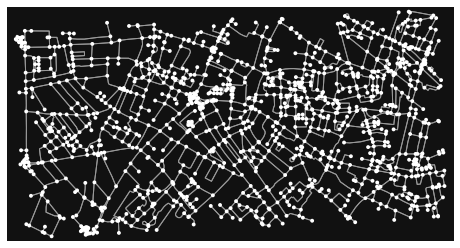

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f626063c150>)

In [ ]:
import osmnx as ox
G = ox.graph_from_bbox(51.504576,51.495609,-0.076348,-0.105158, network_type='walk')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

In [ ]:
all_nodes_ids = list(G.nodes)
G.nodes[107565]
kd_tree_data = [[G.nodes[node]["y"],G.nodes[node]["x"]] for node in all_nodes_ids]

In [ ]:
point = kd_tree_data[1]

In [ ]:
from scipy import spatial
def nearest_node(point):
  distance,index = spatial.KDTree(kd_tree_data).query(point)
  return all_nodes_ids[index],G.nodes[all_nodes_ids[index]]

In [ ]:
node_start,starting_point = nearest_node(kd_tree_data[1])
node_end,destination = nearest_node(kd_tree_data[-1])
print(starting_point,node_start)
print(destination,node_end)

{'y': 51.497685, 'x': -0.0797899, 'street_count': 4} 108118
{'y': 51.5026678, 'x': -0.0898524, 'street_count': 3} 8601352906


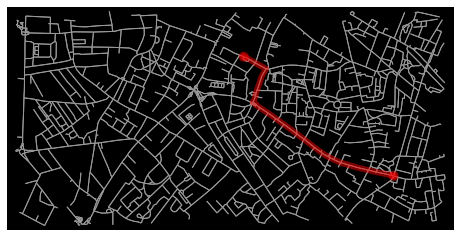

In [ ]:
import networkx as nx
route = nx.shortest_path(G, node_start, node_end, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

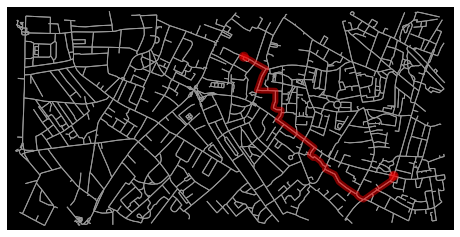

In [ ]:
#OSMNX Implementation
origin = (starting_point['y'],starting_point['x'])
destination = (destination['y'],destination['x'])
origin_node = ox.get_nearest_node(G, origin)
destination_node = ox.get_nearest_node(G, destination)
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

In [ ]:

# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

In [ ]:
# to fill in edges with missing `maxspeed` from OSM
hwy_speeds = {'residential': 35,
              'secondary': 50,
              'tertiary': 60}
G = ox.add_edge_speeds(G, hwy_speeds)
G = ox.add_edge_travel_times(G)

In [ ]:

# calculate two routes by minimizing travel distance vs travel time
route1 = nx.shortest_path(G, node_start, node_end, weight='length')
route2 = nx.shortest_path(G, node_start, node_end, weight='travel_time')

In [ ]:
# compare the two routes
route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, 'length')))
route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, 'length')))
route1_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, 'travel_time')))
route2_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, 'travel_time')))
print('Route 1 is', route1_length, 'meters and takes', route1_time, 'seconds.')
print('Route 2 is', route2_length, 'meters and takes', route2_time, 'seconds.')

Route 1 is 1041 meters and takes 315 seconds.
Route 2 is 1305 meters and takes 117 seconds.
